# Assesment Question2

### Reading the Q2 2018 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_excel('Q2_2018.xlsx')
df.head()

,Invoice Date,Transaction Date,Package Quantity,Oversize Quantity,Tracking Number,Entered Weight,Billed Weight,Package Dimensions,Zone,Charge Description,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2018-08-04,2018-08-02,1,0,1Z2342VF0346355801,21.0,21,NaN,7.0,Ground Commercial Collect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,NaN,7.0,Addl. Handling longest side,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,NaN,7.0,Declared Value,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,NaN,7.0,Fuel Surcharge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,NaN,7.0,Addl. Handling longest side,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding Data

In [3]:
df.shape

(86999, 25)

In [25]:
df.columns

Index(['Invoice Date', 'Transaction Date', 'Package Quantity',
       'Oversize Quantity', 'Tracking Number', 'Entered Weight',
       'Billed Weight', 'Package Dimensions', 'Zone', 'Charge Description',
       'Net Amount', 'Sender Postal', 'Receiver Postal', 'Detail Keyed Dim',
       'diff', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.dtypes

Invoice Date          datetime64[ns]
Transaction Date      datetime64[ns]
Package Quantity               int64
Oversize Quantity              int64
Tracking Number               object
Entered Weight               float64
Billed Weight                  int64
Package Dimensions            object
Zone                         float64
Charge Description            object
Net Amount                   float64
Sender Postal                 object
Receiver Postal              float64
Detail Keyed Dim              object
diff                         float64
Unnamed: 15                  float64
Unnamed: 16                  float64
Unnamed: 17                  float64
Unnamed: 18                   object
Unnamed: 19                   object
Unnamed: 20                  float64
Unnamed: 21                  float64
Unnamed: 22                  float64
Unnamed: 23                   object
Unnamed: 24                   object
dtype: object

## Cleaning the data

### Identifying and Handling Missing Values

In [30]:
df.isnull().sum()

Invoice Date              0
Transaction Date          0
Package Quantity          0
Oversize Quantity         0
Tracking Number           6
Entered Weight            0
Billed Weight             0
Package Dimensions    85599
Zone                     12
Charge Description        2
Net Amount                0
Sender Postal           381
Receiver Postal          12
Detail Keyed Dim      72928
diff                      0
Unnamed: 15           86999
Unnamed: 16           86999
Unnamed: 17           86999
Unnamed: 18           86915
Unnamed: 19           86915
Unnamed: 20           86999
Unnamed: 21           86999
Unnamed: 22           86999
Unnamed: 23           63265
Unnamed: 24           63265
dtype: int64

In [31]:
df=df.iloc[:,:15]  #Considering the 


In [32]:
df.shape

(86999, 15)

In [33]:
df.isnull().sum()/df.shape[0]*100  ##percent of missing values

Invoice Date           0.000000
Transaction Date       0.000000
Package Quantity       0.000000
Oversize Quantity      0.000000
Tracking Number        0.006897
Entered Weight         0.000000
Billed Weight          0.000000
Package Dimensions    98.390786
Zone                   0.013793
Charge Description     0.002299
Net Amount             0.000000
Sender Postal          0.437936
Receiver Postal        0.013793
Detail Keyed Dim      83.826251
diff                   0.000000
dtype: float64

Since the variables/columns Package Dimensions and Detail Keyed Dim have more than 80 percent missing values, their presence won't be significant to the analysis. Hence, they are dropped/not considered for this analysis

In [34]:
df=df.drop(columns=['Package Dimensions'])


In [35]:
df=df.drop(columns=['Detail Keyed Dim'])

In [36]:
df.isnull().sum()

Invoice Date            0
Transaction Date        0
Package Quantity        0
Oversize Quantity       0
Tracking Number         6
Entered Weight          0
Billed Weight           0
Zone                   12
Charge Description      2
Net Amount              0
Sender Postal         381
Receiver Postal        12
diff                    0
dtype: int64

In [37]:
df['Sender Postal'].unique()

array(['49417 2180', 8512, 2649, nan, 85123259, 11209, 6035, 11378, 8701,
       18614, 21074, 13850, 70118, 11021, 2459, 83702765, 54313, 8889,
       19144, 20814, 19428, 20607, 7080, 21218, 8876, 63123, 24486, 2127,
       17025, 61734, 21231, 1571, 22153, 8755, 29841, 10040, 85122, 12737,
       33761, 7720, 98373, 11232, 98527, 43207, 12563, 432075100, 37421,
       43232, 75231, 62704, 13760, 97058, 92336, 80440, 7071, 84781,
       37865, 98512, 81091, 61080, 46074, 23462, 54241, 59802, 43110,
       89032, 75116, 30161, 80111, 23113, 84106, 28615, 97208, 22812,
       98272, 60557, 76527, 43068, 71006, 33401, 75601, 44035, 68128,
       77013, 30501, 33160, 78744, 66206, 46120, 76437, 10121, 90274,
       63131, 92277, 18301, 43215, 97367, 19014, 92113, 64747, 80211,
       46236, 7076, 77494, 27406], dtype=object)

In [38]:
df['Sender Postal'].fillna(0,inplace=True)

In [39]:
df.isnull().sum()

Invoice Date           0
Transaction Date       0
Package Quantity       0
Oversize Quantity      0
Tracking Number        6
Entered Weight         0
Billed Weight          0
Zone                  12
Charge Description     2
Net Amount             0
Sender Postal          0
Receiver Postal       12
diff                   0
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

Invoice Date          0
Transaction Date      0
Package Quantity      0
Oversize Quantity     0
Tracking Number       0
Entered Weight        0
Billed Weight         0
Zone                  0
Charge Description    0
Net Amount            0
Sender Postal         0
Receiver Postal       0
diff                  0
dtype: int64

#### Cleaning the postal columns

In [42]:
df['Receiver Postal']=df['Receiver Postal'].astype('str')

In [43]:
df['Sender Postal']=df['Sender Postal'].astype('str')

In [44]:
small=df['Sender Postal'].str.len()<5

In [45]:
df['Sender Postal'][small]='0'+ df['Sender Postal'][small]

<ipython-input-45-fca943846ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sender Postal'][small]='0'+ df['Sender Postal'][small]


In [47]:
long_zip=df['Sender Postal'].str.len()>5

In [48]:
df['Sender Postal'][long_zip].unique()

array(['49417 2180', '85123259', '83702765', '432075100'], dtype=object)

In [49]:
df['Sender Postal'][long_zip]=df['Sender Postal'][long_zip].str.slice(0,5)

<ipython-input-49-5713a4b9ba0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sender Postal'][long_zip]=df['Sender Postal'][long_zip].str.slice(0,5)


In [50]:
df['Sender Postal'].unique()

array(['49417', '08512', '02649', '00', '85123', '11209', '06035',
       '11378', '08701', '18614', '21074', '13850', '70118', '11021',
       '02459', '83702', '54313', '08889', '19144', '20814', '19428',
       '20607', '07080', '21218', '08876', '63123', '24486', '02127',
       '17025', '61734', '21231', '01571', '22153', '08755', '29841',
       '10040', '85122', '12737', '33761', '07720', '98373', '11232',
       '98527', '43207', '12563', '37421', '43232', '75231', '62704',
       '13760', '97058', '92336', '80440', '07071', '84781', '37865',
       '98512', '81091', '61080', '46074', '23462', '54241', '59802',
       '43110', '89032', '75116', '30161', '80111', '23113', '84106',
       '28615', '97208', '22812', '98272', '60557', '76527', '43068',
       '71006', '33401', '75601', '44035', '68128', '77013', '30501',
       '33160', '78744', '66206', '46120', '76437', '10121', '90274',
       '63131', '92277', '18301', '43215', '97367', '19014', '92113',
       '64747', '80211'

In [52]:
rows_w_zero=df['Sender Postal'].str.len()<3

In [53]:
df['Sender Postal'][rows_w_zero]=np.nan

<ipython-input-53-75ce438c42c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sender Postal'][rows_w_zero]=np.nan


In [54]:
df['Sender Postal'].unique()

array(['49417', '08512', '02649', nan, '85123', '11209', '06035', '11378',
       '08701', '18614', '21074', '13850', '70118', '11021', '02459',
       '83702', '54313', '08889', '19144', '20814', '19428', '20607',
       '07080', '21218', '08876', '63123', '24486', '02127', '17025',
       '61734', '21231', '01571', '22153', '08755', '29841', '10040',
       '85122', '12737', '33761', '07720', '98373', '11232', '98527',
       '43207', '12563', '37421', '43232', '75231', '62704', '13760',
       '97058', '92336', '80440', '07071', '84781', '37865', '98512',
       '81091', '61080', '46074', '23462', '54241', '59802', '43110',
       '89032', '75116', '30161', '80111', '23113', '84106', '28615',
       '97208', '22812', '98272', '60557', '76527', '43068', '71006',
       '33401', '75601', '44035', '68128', '77013', '30501', '33160',
       '78744', '66206', '46120', '76437', '10121', '90274', '63131',
       '92277', '18301', '43215', '97367', '19014', '92113', '64747',
       '80211',

In [59]:
df['Receiver Postal']=df['Receiver Postal'].astype('int')

In [60]:
df['Receiver Postal']=df['Receiver Postal'].astype('str')

In [61]:
df['Receiver Postal'].unique()

array(['89506', '1520', '26711', ..., '32024', '95519', '32533'],
      dtype=object)

In [62]:
rows_small=df['Receiver Postal'].str.len()<5

In [63]:
df['Receiver Postal'][rows_small].unique()

array(['1520', '1760', '6901', ..., '3220', '7421', '7747'], dtype=object)

In [64]:
df['Receiver Postal'][rows_small]='0'+ df['Receiver Postal'][rows_small]

<ipython-input-64-523a38283990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Receiver Postal'][rows_small]='0'+ df['Receiver Postal'][rows_small]


In [65]:
df['Receiver Postal'].unique()

array(['89506', '01520', '26711', ..., '32024', '95519', '32533'],
      dtype=object)

### Analysing Data

In [155]:
df.describe()

,Package Quantity,Oversize Quantity,Entered Weight,Billed Weight,Zone,Net Amount,diff,month
count,86987.000000,86987.0,86987.000000,86987.000000,86987.000000,86987.000000,86987.000000,86987.000000
mean,0.421293,0.0,3.046807,4.025096,8.618529,2.726004,0.978289,7.207709
std,0.494025,0.0,8.225477,10.011422,28.604678,7.462456,4.210156,0.405868
min,-1.000000,0.0,0.000000,0.000000,0.000000,-74.030000,-34.000000,6.000000
25%,0.000000,0.0,0.000000,0.000000,2.000000,0.400000,0.000000,7.000000
50%,0.000000,0.0,0.000000,0.000000,4.000000,1.750000,0.000000,7.000000
75%,1.000000,0.0,0.900000,2.000000,5.000000,5.600000,0.100000,7.000000
max,1.000000,0.0,100.500000,212.000000,308.000000,650.000000,165.000000,8.000000


#### Number of Transactions per Zone

In [68]:
df['Zone'].value_counts()

2.0      23687
4.0      18466
3.0      15834
5.0      11743
8.0       6864
6.0       5090
7.0       2435
208.0      292
134.0      258
102.0      256
103.0      251
205.0      216
104.0      193
44.0       173
105.0      151
207.0      119
306.0      112
135.0      104
108.0      103
308.0       95
138.0       87
206.0       81
0.0         76
133.0       52
106.0       51
136.0       38
46.0        36
107.0       33
307.0       26
137.0       21
224.0       17
126.0        8
204.0        4
303.0        4
132.0        4
203.0        4
305.0        3
Name: Zone, dtype: int64

#### Net amount per Zone (Top 10)

In [69]:
zone_amount=df.groupby('Zone')['Net Amount'].sum().sort_values(ascending=False).reset_index()

In [70]:
zone_amount.head(10)

,Zone,Net Amount
0,2.0,56537.20
1,4.0,44752.35
2,3.0,36516.62
3,5.0,33486.12
4,8.0,22527.40
5,6.0,13993.53
6,7.0,6865.82
7,208.0,2292.17
8,105.0,1965.01
9,134.0,1905.86


#### Number of transactions per Charge

In [71]:
df['Charge Description'].value_counts()

Fuel Surcharge                        23988
Ground Residential                    20334
Residential Surcharge                 14719
Ground Commercial                     12077
Delivery Area Surcharge - Extended     4326
                                      ...  
Missing/Invalid Acct No.                  1
Saturday Delivery                         1
3 Day Select Undeliverable Return         1
Void Addl. Handling weight                1
GSR Next Day Air Early Commercial         1
Name: Charge Description, Length: 77, dtype: int64

In [156]:
df['Charge Description'].value_counts()[:10]

Fuel Surcharge                               23988
Ground Residential                           20334
Residential Surcharge                        14719
Ground Commercial                            12077
Delivery Area Surcharge - Extended            4326
Delivery Area Surcharge                       3301
Shipping Charge Correction Ground             1549
Addl. Handling second long. Side              1054
Shipping Charge Correction Fuel Surcharge     1031
Residential Adjustment                         899
Name: Charge Description, dtype: int64

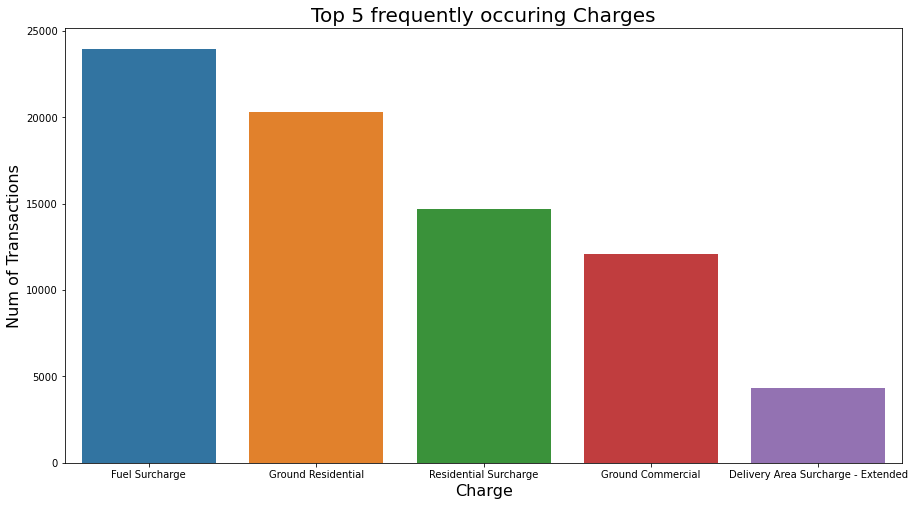

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Charge Description'].value_counts().index[0:5],y=df['Charge Description'].value_counts()[0:5],data=df)
plt.title("Top 5 frequently occuring Charges", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Num of Transactions", fontsize=16)
plt.show()

#### Net amount for Charge Description(top 10)

In [126]:
net_amt_charge=df.groupby('Charge Description')['Net Amount'].sum().sort_values(ascending=False).reset_index()

In [127]:
net_amt_charge.head(10)


,Charge Description,Net Amount
0,Ground Residential,87320.53
1,Ground Commercial,55989.26
2,Residential Surcharge,25609.86
3,Fuel Surcharge,11815.40
4,Delivery Area Surcharge - Extended,9094.15
5,Shipping Charge Correction Large Package Surch...,8640.00
6,Delivery Area Surcharge,5093.46
7,Shipping Charge Correction Over Maximum Size,3900.00
8,Shipping Charge Correction Large Package Surch...,3328.00
9,Next Day Air Commercial,3024.34


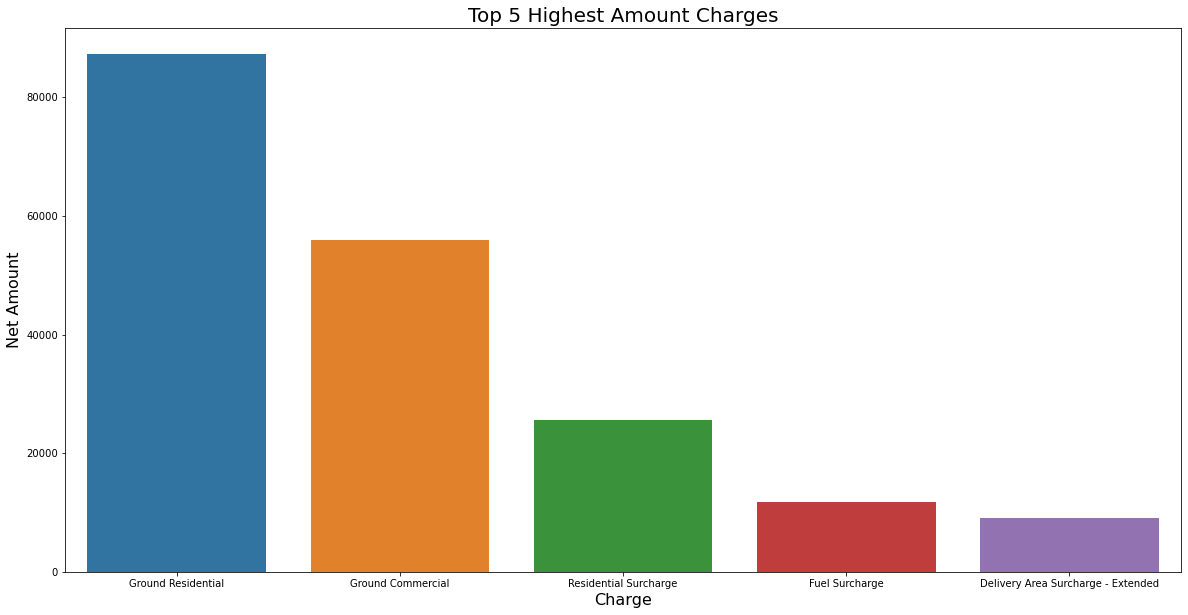

In [128]:
plt.figure(figsize=(20,10))
sns.barplot(x=net_amt_charge['Charge Description'][0:5],y=net_amt_charge['Net Amount'][0:5],data=net_amt_charge)
plt.title("Top 5 Highest Amount Charges", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Net Amount", fontsize=16)
plt.show()

#### Average Net Amount for Charges

In [129]:
avg_amt_charge=df.groupby('Charge Description')['Net Amount'].mean().sort_values(ascending=False).reset_index()

In [161]:
avg_amt_charge.columns=['Charge Description','Avg Net Amount']

In [162]:
avg_amt_charge.head(10)

,Charge Description,Avg Net Amount
0,Shipping Charge Correction Over Maximum Size,650.000000
1,Shipping Charge Correction Large Package Surch...,72.000000
2,Shipping Charge Correction LPS Longest Side Re...,72.000000
3,Shipping Charge Correction Large Package Surch...,64.000000
4,Next Day Air Early Commercial,56.116667
5,Next Day Air Early Residential,48.108889
6,Early Surcharge,30.000000
7,Next Day Air Saver Commercial,18.252527
8,Remote Area Surcharge,17.000000
9,3 Day Select Commercial,16.096000


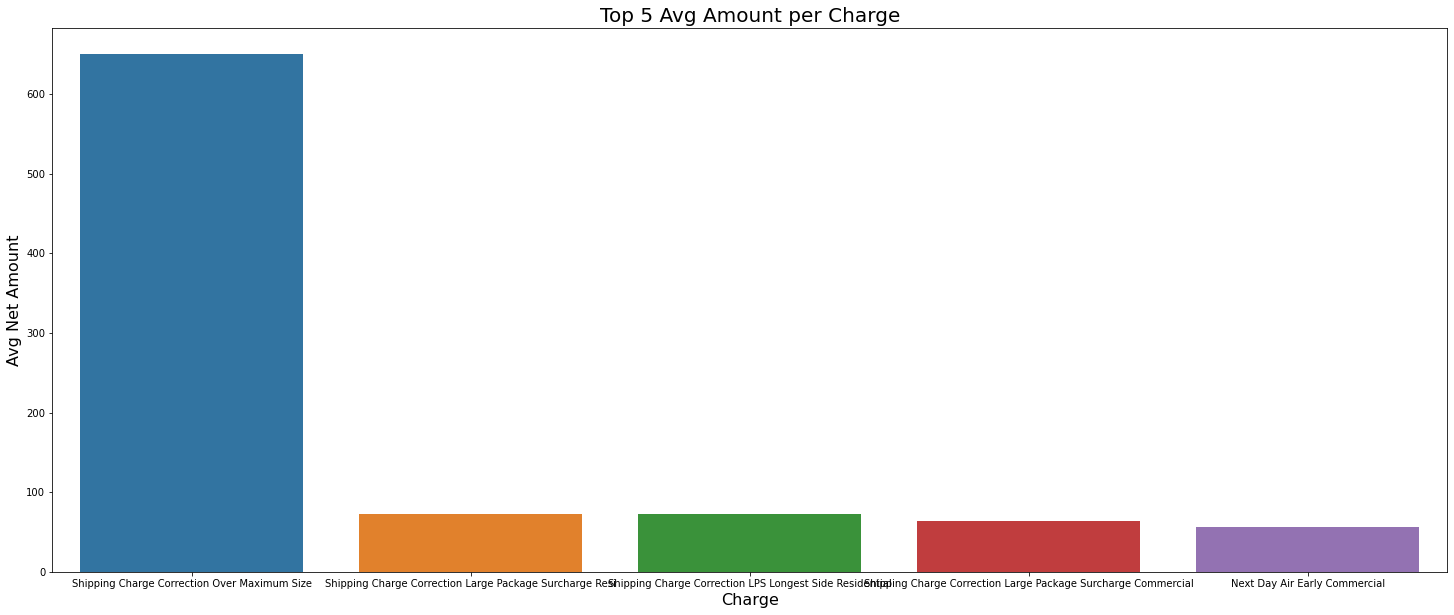

In [163]:
plt.figure(figsize=(25,10))
sns.barplot(x=avg_amt_charge['Charge Description'][0:5],y=avg_amt_charge['Avg Net Amount'][0:5],data=avg_amt_charge)
plt.title("Top 5 Avg Amount per Charge", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Avg Net Amount", fontsize=16)
plt.show()

#### Analysis of 'diff'
##### diff- Column that contains the difference between the 'Entered Weight' and 'Billed Weight'

In [83]:
df['diff'].sum()

85098.4

In [84]:
df['diff'].mean()

0.9782887098072135

<AxesSubplot:>

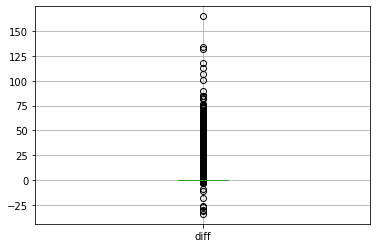

In [87]:
df.boxplot('diff')

#### Relationship between Billed Weight and Entered Weight

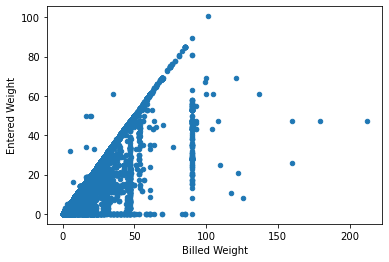

In [88]:
weight=df.plot.scatter(x='Billed Weight',y='Entered Weight')

#### Relationship between Billed Weight and Net Amount

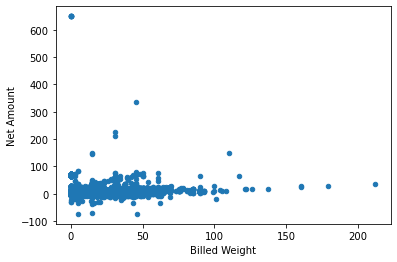

In [89]:
bweight_amount=df.plot.scatter(x='Billed Weight',y='Net Amount')

#### Relationship between Entered Weight and Net Amount


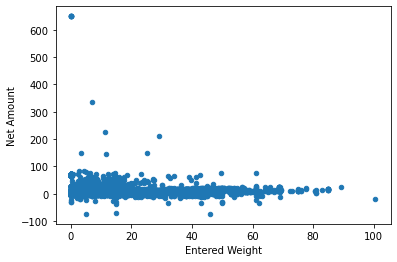

In [90]:
eweight_amount=df.plot.scatter(x='Entered Weight',y='Net Amount')

#### Correlation Analysis

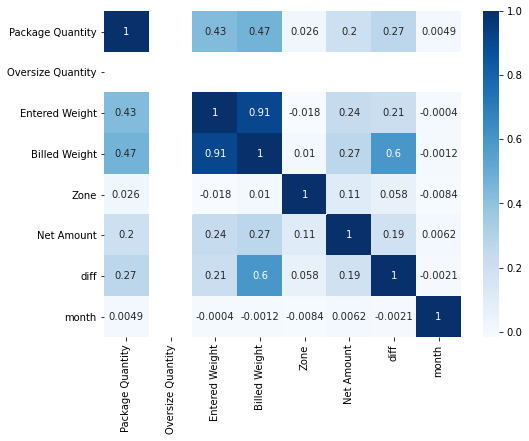

In [154]:
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### Analysis of 'Transaction Date'

In [134]:
import datetime

In [135]:
df['month'] = pd.DatetimeIndex(df['Transaction Date']).month
df.head()

,Invoice Date,Transaction Date,Package Quantity,Oversize Quantity,Tracking Number,Entered Weight,Billed Weight,Zone,Charge Description,Net Amount,Sender Postal,Receiver Postal,diff,month
0,2018-08-04,2018-08-02,1,0,1Z2342VF0346355801,21.0,21,7.0,Ground Commercial Collect,9.30,49417,89506,0.0,8
1,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,7.0,Addl. Handling longest side,4.80,49417,89506,0.0,8
2,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,7.0,Declared Value,2.70,49417,89506,0.0,8
3,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,7.0,Fuel Surcharge,0.54,49417,89506,0.0,8
4,2018-08-04,2018-08-02,0,0,1Z2342VF0346355801,0.0,0,7.0,Addl. Handling longest side,0.00,49417,89506,0.0,8


In [136]:
df['Transaction Date'].max()

Timestamp('2018-08-04 00:00:00')

In [137]:
df['Transaction Date'].min()

Timestamp('2018-06-26 00:00:00')

#### Number of monthly transactions

In [138]:
month_n=df.groupby(['month'])['Transaction Date'].count().reset_index()

In [140]:
month_n.columns=['month','Number of Transactions']

In [141]:
month_n.head()

,month,Number of Transactions
0,6,7
1,7,68905
2,8,18075


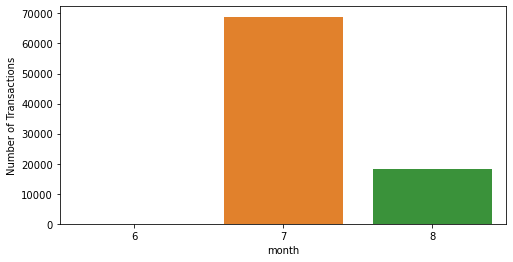

In [142]:
plt.figure(figsize=(8,4))
sns.barplot(x=month_n['month'],y=month_n['Number of Transactions'],data=month_n)
plt.show()

#### Net Amount per Month

In [144]:
month_n_amt=df.groupby(['month'])['Net Amount'].sum().reset_index()

In [145]:
month_n_amt.head()

,month,Net Amount
0,6,17.55
1,7,186210.78
2,8,50898.56


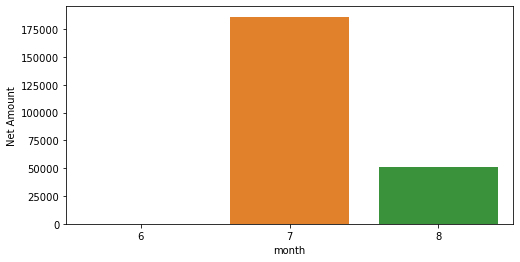

In [146]:
plt.figure(figsize=(8,4))
sns.barplot(x=month_n_amt['month'],y=month_n_amt['Net Amount'],data=month_n_amt)
plt.show()

In [147]:
month_t=df.groupby(['month','Charge Description'])['Net Amount'].sum().reset_index()

In [148]:
month_t

,month,Charge Description,Net Amount
0,6,Not Previously Billed Delivery Area Surcharge,1.75
1,6,Not Previously Billed Fuel Surcharge,1.00
2,6,Not Previously Billed Ground Residential,11.20
3,6,Not Previously Billed Residential Surcharge,3.60
4,7,2nd Day Air Commercial,1571.71
...,...,...,...
109,8,Shipping Charge Correction Large Package Surch...,704.00
110,8,Shipping Charge Correction Large Package Surch...,1800.00
111,8,Shipping Charge Correction Next Day Air,28.40
112,8,Shipping Charge Correction Next Day Air Saver,26.44


In [149]:
month_t[month_t['Charge Description']=='Fuel Surcharge']

,month,Charge Description,Net Amount
18,7,Fuel Surcharge,9341.93
82,8,Fuel Surcharge,2473.47


In [150]:
month_t[month_t['Charge Description']=='Ground Residential']

,month,Charge Description,Net Amount
36,7,Ground Residential,69985.40
85,8,Ground Residential,17335.13


#### Avg Amount per Month

In [151]:
month_t_avg=df.groupby(['month','Charge Description'])['Net Amount'].mean().reset_index()

In [152]:
month_t_avg[month_t_avg['Charge Description']=='Fuel Surcharge']

,month,Charge Description,Net Amount
18,7,Fuel Surcharge,0.495935
82,8,Fuel Surcharge,0.480192


In [153]:
month_t_avg[month_t_avg['Charge Description']=='Ground Residential']

,month,Charge Description,Net Amount
36,7,Ground Residential,4.370264
85,8,Ground Residential,4.012762
